In [6]:

import numpy as np
import scipy as sp
from scipy import stats
#import pymc3 as pm

import matplotlib.pyplot as plt

# References
The following are useful statastical and data handling references for the various tools we are using

## pymc3
* continuous distributions: https://docs.pymc.io/api/distributions/continuous.html
* discrete distributions: https://docs.pymc.io/api/distributions/discrete.html
* Sampling and inference: https://docs.pymc.io/api/inference.html
* Model class: https://docs.pymc.io/api/model.html

## scipy
* statistical functions: https://docs.scipy.org/doc/scipy/reference/stats.html
* special functions package: https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special

## numpy
* numpy API: https://numpy.org/doc/stable/reference/index.html

# Modeling steps
Given some data, the three steps of Bayesian modeling are as follows:
1. Choose priors for your variables
2. Define the model that represents your data
3. MC sample to determine your posterior

# First lets simulate some data
Here we simulate some data that we can use to practice the modeling steps in `pymc3`

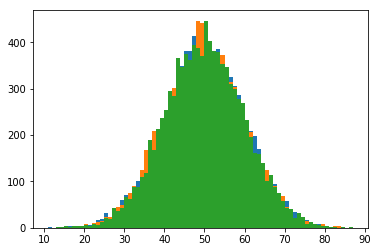

In [9]:
mu = 50
sig = 10

norm_data = sp.stats.norm.rvs(mu, sig, size=10000)

x = np.array(range(int(min(norm_data)), int(max(norm_data))))
plt.hist(norm_data, bins=x);
plt.show()

# Pymc3
Here is the way these steps are performed using `pymc3`


## 1. Instantiate a `Model` context
First you must instantiate a `Model` class in which to build the model

```
with pm.Model() as m:
    ...
    <model code here>
    ...
```

alternatively...

```
m = pm.Model()
```

## 2. Set your variables equal to their prior distributions
A prior is a distribution and each variable must have one (though it can be a constant). In `pymc3` parlance, the variable is set equal to its prior distribution. There are many distributions to chose from, each with their own parameterization.

```
a = pm.Uniform("var_a", lower=5, upper=30)
b = pm.Exponential("var_b", lam = 0.05)
c = pm.Binomial("var_c", n=4, p=0.5)
```

Variables can be used for the parameters of of other variables

```
prob = pm.Beta('binomial_prob', alpha=5, beta=5)
binom = pm.Binomial('binom_var', n=10, p=prob)
```

## 3. Your model for the data is also a variable, but contains the data
The model that describes the data is defined in the same manner as the priors for your variables with the exception that it is also contains the data to which it is compared.

```
norm_mu = pm.Uniform('norm_location', lower=100, upper=500)
norm_sig = pm.Exponential('norm_width', lam=0.001)

observed = pm.Normal('normal_model', mu=norm_mu, sigma=norm_sig, observed=my_data)
```

## With the model built, we must now sample from it
The model and the corresponding data it is supposed to represent are all contained in our model class object. Sampling can be done in a single line

```
with m:
    trace = pm.sample(10000, cores=1)
```

alternatively...

```
trace = pm.sample(10000, model=m, cores=1)
```

The default sampler is the NUTS sampler, but others are available

```
with m:
    step_method = pm.Metropolis()
    trace = pm.sample(10000, step=step_method, cores=1)
```

## Plot the results of your sampled posteriors
Once you have sampled the posterior distribution of your model, you can plot the results. There are a couple of built in plotting functions to help visualize this.

```
pm.traceplot(trace)
pm.plot_posterior(trace)
```

# Let's try with the Gaussian's discrete counterpart
Discrete distributions can also be modeled with `pymc3`, for example the binomial distribution

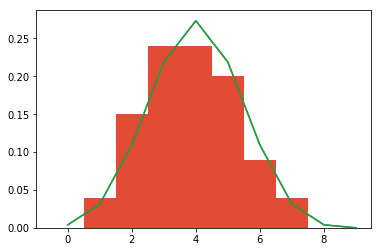

In [11]:
n = 8
p = 0.5
x = np.array(range(0, 10))
binom_pmf = sp.stats.binom.pmf(x, n, p)
binom_data = sp.stats.binom.rvs(n, p, size=100, random_state=42)

plt.plot(x, binom_pmf);
plt.hist(binom_data, bins=x, alpha=0.7, density=True, align='left');
plt.show()

## Let's do a quick aside about the `Beta` distribution
* Continuous distribution over range [0, 1]
* Shape controlled by two parameters `alpha` and `beta`
* Depending on parameter values can be skewed to either side or symmetric about the middle
* Is useful for probability parameters of other distributions

When `alpha` and `beta` are equal to one another

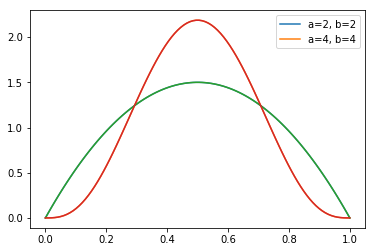

In [13]:
x = np.linspace(0, 1, 100)

a2b2 = sp.stats.beta.pdf(x, 2, 2)
a4b4 = sp.stats.beta.pdf(x, 4, 4)
plt.plot(x, a2b2)
plt.plot(x, a4b4)
plt.legend(['a=2, b=2', 'a=4, b=4']);
plt.show()

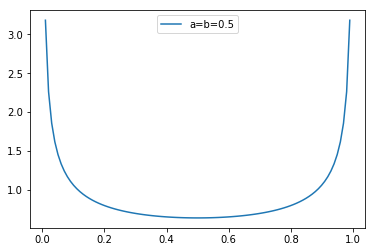

In [14]:
x = np.linspace(0, 1, 100)
ab0p5 = sp.stats.beta.pdf(x, 0.5, 0.5)
#ab0p2 = sp.stats.beta.pdf(x, 0.2, 0.2)
plt.plot(x,ab0p5)
plt.legend(['a=b=0.5']);
plt.show()

When `alpha` and `beta` are NOT equal to one another

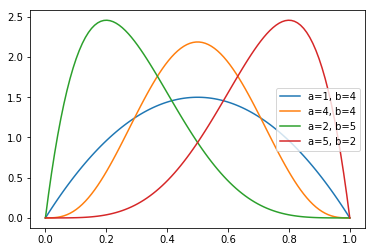

In [15]:
x = np.linspace(0, 1, 100)

a1b4 = sp.stats.beta.pdf(x, 1, 4)
a4b1 = sp.stats.beta.pdf(x, 4, 1)
a2b5 = sp.stats.beta.pdf(x, 2, 5)
a5b2 = sp.stats.beta.pdf(x, 5, 2)
plt.plot(x, a2b2)
plt.plot(x, a4b4)
plt.plot(x, a2b5)
plt.plot(x, a5b2)
plt.legend(['a=1, b=4', 'a=4, b=4', 'a=2, b=5', 'a=5, b=2']);
plt.show()

## So now lets model the binomial data
We do this in the same way as before except that our final model distribution is a discrete one
```
with pm.Model() as m:

    ...parameter stuff first...
    
    binom_obs = pm.Binomial('observed_binomial', n=??, p=??, observed=??)
``` 